In [1]:
import time
from tictactoe.game import TicTacToe
from tictactoe.human import Human
from tictactoe.agent import Agent

# AI vs Human

In [2]:
player1 = Agent('AI')
player2 = Human('Human')

In [ ]:
board = TicTacToe(player1, player2)

In [ ]:
display(board)
time.sleep(0.1)
board.next_turn()
display(board)

# AI vs AI

In [117]:
playerX = Agent('AI1')
playerY = Agent('AI2')

In [227]:
board = TicTacToe(playerX, playerY)

while not board.finished:
    board.next_turn()
    
display(board)

AI1 chooses move 9
AI2 chooses move 5
AI1 chooses move 1
AI2 chooses move 4
AI1 chooses move 6
AI2 chooses move 3
AI1 chooses move 7
AI2 chooses move 8
AI1 chooses move 2
It's a draw!


In [118]:
history = {
    playerX: [0],
    playerY: [0],
    None: [0]
}

playerX.learning_rate = 0.1
playerX.explore = 0.1
playerY.learning_rate = 0.01
playerY.explore = 0.3

board = TicTacToe(playerX, playerY)

for i in range(20000):
    if i % 1000 == 0:
        print(i)
    
    board.print = False
    
    while not board.finished:
        board.next_turn()
        
    for p in history:
        history[p].append(history[p][-1])
    
    history[board.winner][-1] += 1
        
    board.reset()
    board.turn_p1 = i % 2  # take turns in starting
    
print("FINISHED!")
print(playerX.name, history[playerX][-1])
print(playerY.name, history[playerY][-1])

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
FINISHED!
AI1 6198
AI2 2952


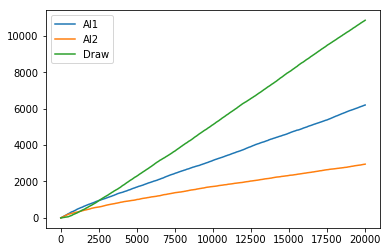

In [119]:
import matplotlib.pyplot as plt

plt.plot(history[playerX], label=playerX.name)
plt.plot(history[playerY], label=playerY.name)
plt.plot(history[None], label='Draw')
plt.legend()
plt.show()

In [243]:
playerX.explore = 0
board = TicTacToe(playerX, player2)
board.turn_p1 = True

In [252]:
display(board)
time.sleep(0.1)
board.next_turn()
display(board)

AI1 chooses move 6
It's a draw!


# TODO
- Improve hashing by taking into account reversed (v1) // later: mirrored and rotated (v2)
